# ATMO 5331 - Homework 1 - Fall 2021
## Due 7 Sep, 2021


When doing this homework, remember that you have two jobs:
1. Make it work.
2. Clean it up so that I can understand what you've done. If you think I might not understand, document it with a comment or a function docstring.

You should present your work with a clear logical progression. If that seems like a hassle, remember that in doing so you are practicing skills that are expected in your thesis and journal publications.

You may work alone or in pairs. I will not be adjudicating relative level of effort in group work, so you are responsible for ensuring that you and your partner contribute equally.

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

In [98]:
import numpy as np

mcom_lon, mcom_lat = -101.8803718553, 33.5818617015
mcom_alt = 957.179

**1.** Create the 1D arrays `lon` and `lat`, centered on MCOM and incrementing by 5 degrees. There should be 7 longitude and 5 latitude values. (10 pts.)

The sample code also includes data array `d` with the shape (`nlat`, `nlon`), and defines some values so that we all have the same dataset. A plot of the data array in index coordintes is also included.

Together these arrays define the grid cell center locations and corresponding data values.

[-116.88037186 -111.88037186 -106.88037186 -101.88037186  -96.88037186
  -91.88037186  -86.88037186]
[23.5818617 28.5818617 33.5818617 38.5818617 43.5818617]


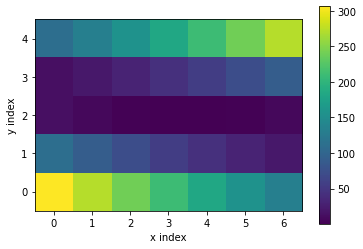

In [99]:
nlon = 7
nlat = 5
dlon, dlat = 5.0, 5.0

d = (np.arange(nlon*nlat) - (nlon*nlat/2.0))**2.0
d.shape = (nlat, nlon)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(d, origin='lower')
plt.colorbar(im)
ax.set_xlabel('x index')
ax.set_ylabel('y index')

# Here I created a 1D array for lon. To do so I used mcom_lon as a center point for the array. 
# I knew that we needed 7 total lon values, so I added three values before and after mcom_lon to the array.
# I did so by simply adding or subtracting the change of lon, which in our case was 5. 
lon = np.array ([mcom_lon-3*dlon, mcom_lon-2*dlon, mcom_lon-dlon, mcom_lon, mcom_lon+dlon, mcom_lon+2*dlon, mcom_lon+3*dlon])

# Here I created a 1D array for lat. To do so I used mcom_lat as a center point for the array. 
# I knew that we needed 5 total lat values, so I added two values before and after mcom_lat to the array.
# I did so by simply adding or subtracting the change of lat, which in our case was 5. 
lat = np.array ([mcom_lat-2*dlat, mcom_lat-dlat, mcom_lat, mcom_lat+dlat, mcom_lat+2*dlat])

print(lon)
print(lat)

**2.** Since the image is regularly gridded in lon/lat We can use the `extent` keyword argument to `imshow` to specify the bounds of the image, as you see below. Is this plot correct or incorrect? Explain how the `extent` keyword argument works using the language of centers, edges, and nodes. (10 pts.)

`print(ax.axis())` might be useful in understanding what you are seeing.

(-116.8803718553, -86.8803718553, 23.581861701500003, 43.5818617015)


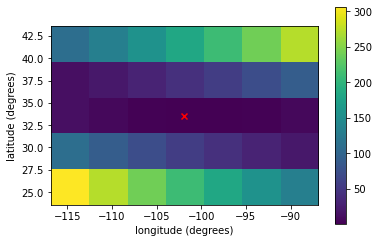

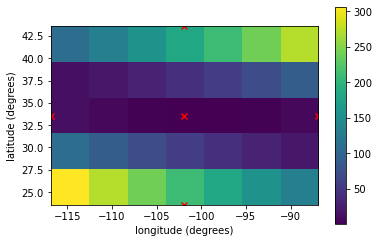

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.imshow(d, origin='lower', extent=(lon.min(), lon.max(), lat.min(), lat.max()))
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')
print(ax.axis())

# ------------------------------------------------------------------------------------------
# Below I have plotted the same plot as above, just with a few extra points plotted.
# I did this to better visualize what was going on in this particular plot.

fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.imshow(d, origin='lower', extent=(lon.min(), lon.max(), lat.min(), lat.max()))
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

ax.scatter(mcom_lon+3*dlon, mcom_lat, marker='x', color='red')
ax.scatter(mcom_lon-3*dlon, mcom_lat, marker='x', color='red')
ax.scatter(mcom_lon, mcom_lat+2*dlat, marker='x', color='red')
ax.scatter(mcom_lon, mcom_lat-2*dlat, marker='x', color='red')

ANSWER: 
From my understanding, extent changes our pixel locations. If we do not use extent, then our pixels centers will be located on their corresponding pixel number (so they will be plotted on integers). The extend keyword is essentially defining our left/right and top/bottom limits or bounds. In our case, we difined the limits as our min/max lon/lat values. Ideally we want out max/min lat/lon vlaues to be plotted as centers, right?. However in the plot above, they are being plotted as edge values. For this reason, I believe this plot is incorrect. This plot is incorrect in terms of what we are tring to achieve. Overall, its not regularly grided. 

**3.** Write a function that converts 1D center positions to edge positions. Use the closest adjacent spacing to extend the start and end of the array. Use this function to create two arrays `lat_edge` and `lon_edge` and print their values. Is the new figure created with `imshow` correct? Explain your answer. (20 pts.)

[-119.38037186 -114.38037186 -109.38037186 -104.38037186  -99.38037186
  -94.38037186  -89.38037186  -84.38037186]
[21.0818617 26.0818617 31.0818617 36.0818617 41.0818617 46.0818617]


Text(0, 0.5, 'latitude (degrees)')

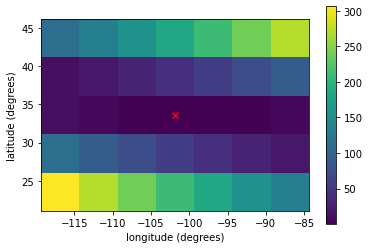

In [101]:
def centers_to_edges_1d(x):
    # first I have defined a dx value, which is 5/2 in our case.
    # I got 5/2 because we are incrementing by 5 degrees, but then we divide by two because
    # we want to plot halfway between the 5 degree spacing (if that makes sense).
    # Essentially we are taking the absolute value of the first point in the array 
    # subtracted by the next point, and dividing by 2
    dx =  5/2
    # I then used the arange function
    # (START POINT, STOPING POINT, STEP)
    # We wanted our starting point not be min this time, but min-dx and likewise with max 
    # our setp is 2 times dx, or 5
    value = np.arange(np.min(x)-dx, np.max(x)+dx+dx/2, 2*dx)
    return value
    
lon_edge = centers_to_edges_1d(lon)
lat_edge = centers_to_edges_1d(lat)
print(lon_edge)
print(lat_edge)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(d, origin='lower', extent=(lon_edge.min(), lon_edge.max(), lat_edge.min(), lat_edge.max()))
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')

# ignore all of this. I was just just plotting to get a better idea of what was going on
#ax.scatter(mcom_lon-dlon, mcom_lat-dlat, marker='x', color='red')
#ax.scatter(mcom_lon-2*dlon, mcom_lat-2*dlat, marker='x', color='red')
#ax.scatter(mcom_lon+dlon, mcom_lat+dlat, marker='x', color='red')
#ax.scatter(mcom_lon+2*dlon, mcom_lat+2*dlat, marker='x', color='red')
#ax.scatter(mcom_lon, mcom_lat-dlat, marker='x', color='red')
#ax.scatter(mcom_lon, mcom_lat-2*dlat, marker='x', color='red')
#ax.scatter(mcom_lon-dlon, mcom_lat, marker='x', color='red')
#ax.scatter(mcom_lon-2*dlon, mcom_lat, marker='x', color='red')
#ax.scatter(mcom_lon-3*dlon, mcom_lat, marker='x', color='red')
#ax.scatter(mcom_lon+3*dlon, mcom_lat, marker='x', color='red')
#ax.scatter(mcom_lon+2*dlon, mcom_lat, marker='x', color='red')
#ax.scatter(mcom_lon+dlon, mcom_lat, marker='x', color='red')

ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

ANSWER:
This plot is correct this time. Now each of our lat/lon value combos are centered in each box, with correct edge and center values determined (unlike the plot before). That is what exactly what we were trying to achieve (regular grid with even spacing). The center points are ploted in the centers of each pixel.

**4.** `imshow` works for the data so far because we have a regular grid with even spacing, so we only need to specify the corners. For a more general quadrilateral mesh, we can use `pcolormesh` to create a similar plot. What, if anything, is different about these plots compared to the first two? (10 pts.)

<ipython-input-102-ac94922340c1>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(lon, lat, d)


Text(0, 0.5, 'latitude (degrees)')

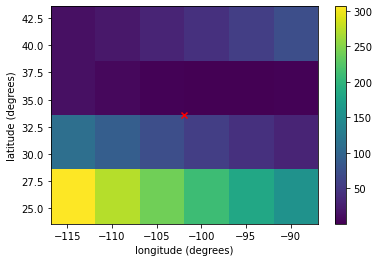

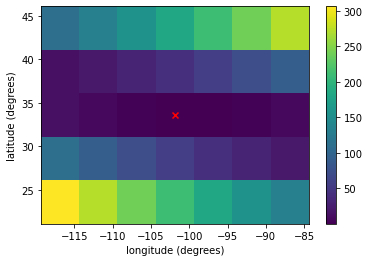

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon, lat, d)
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')


fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon_edge, lat_edge, d)
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

ANSWER: For the first plot, the difference is that we are plotting centers at nodes (or should I say nodes as centers?). Also, the bounds are different compared to the plot in number 3. For the second plot, I do not see any differences in respect to the plot shown in problem 3. In repect to the plot in number two, the bounds are different. The diference in bounds have to do with the extent argument used in number 2.  

**5.** So far, you have used 1D coordinate arrays, and things worked fine because the data were regularly gridded. `pcolormesh` will also accept 2D coordinate arrays. The function `np.meshgrid` creates 2D arrays from 1D arrays. Use `meshgrid` to create these 2D coordinate arrays and use them to make a plot of the data using `pcolormesh`. It should match the correct plot(s) above (20 pts.).

In [103]:
np.meshgrid?

[[3.0625e+02 2.7225e+02 2.4025e+02 2.1025e+02 1.8225e+02 1.5625e+02
  1.3225e+02]
 [1.1025e+02 9.0250e+01 7.2250e+01 5.6250e+01 4.2250e+01 3.0250e+01
  2.0250e+01]
 [1.2250e+01 6.2500e+00 2.2500e+00 2.5000e-01 2.5000e-01 2.2500e+00
  6.2500e+00]
 [1.2250e+01 2.0250e+01 3.0250e+01 4.2250e+01 5.6250e+01 7.2250e+01
  9.0250e+01]
 [1.1025e+02 1.3225e+02 1.5625e+02 1.8225e+02 2.1025e+02 2.4025e+02
  2.7225e+02]]
[[21.0818617 21.0818617 21.0818617 21.0818617 21.0818617 21.0818617
  21.0818617 21.0818617]
 [26.0818617 26.0818617 26.0818617 26.0818617 26.0818617 26.0818617
  26.0818617 26.0818617]
 [31.0818617 31.0818617 31.0818617 31.0818617 31.0818617 31.0818617
  31.0818617 31.0818617]
 [36.0818617 36.0818617 36.0818617 36.0818617 36.0818617 36.0818617
  36.0818617 36.0818617]
 [41.0818617 41.0818617 41.0818617 41.0818617 41.0818617 41.0818617
  41.0818617 41.0818617]
 [46.0818617 46.0818617 46.0818617 46.0818617 46.0818617 46.0818617
  46.0818617 46.0818617]]
[[-119.38037186 -114.38037186 

Text(0, 0.5, 'latitude (degrees)')

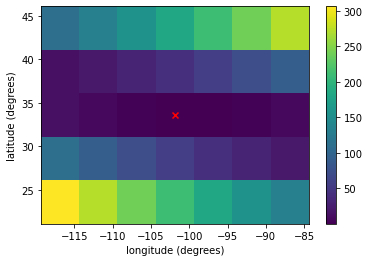

In [104]:
# used the cell above to help me determine how to set up and use meshgrid
lon_edge_2d, lat_edge_2d = np.meshgrid(lon_edge, lat_edge)
    
print(d)
print(lat_edge_2d)
print(lon_edge_2d)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon_edge_2d, lat_edge_2d, d)
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')